In [3]:
import pandas as pd

In [7]:
df = pd.read_csv('housing.csv')

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
df.info

<bound method DataFrame.info of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11    0.11747  12.5   7.87     0  0.524  6.0

In [12]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [13]:
# Change the name to readable columns

new_columns = ["crime-rate", "zoned", "industry", "charles",
"nitric-oxide", "rooms", "age", "employment-center",
"radial-highways", "property-tax", "pupil-teach-ratio",
"proportion-black-families", "poor-people", "median-value"]

df.columns=new_columns

In [16]:
df.head()

,crime-rate,zoned,industry,charles,nitric-oxide,rooms,age,employment-center,radial-highways,property-tax,pupil-teach-ratio,proportion-black-families,poor-people,median-value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
#Target to predict

y = df["median-value"]


# Features

X = df.loc[:, df.columns != "median-value"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
list(zip(df.columns[:-1], lr.coef_))

[('crime-rate', -0.11305592398537892),
 ('zoned', 0.030110464145646984),
 ('industry', 0.04038072041333593),
 ('charles', 2.784438203507977),
 ('nitric-oxide', -17.20263339178146),
 ('rooms', 4.438835199513044),
 ('age', -0.0062963622109802695),
 ('employment-center', -1.4478653685307883),
 ('radial-highways', 0.2624297355850845),
 ('property-tax', -0.010646786275308188),
 ('pupil-teach-ratio', -0.9154562404680748),
 ('proportion-black-families', 0.012351334729969462),
 ('poor-people', -0.5085714244487943)]

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = lr.predict(X_test)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_model

4.928602182665353

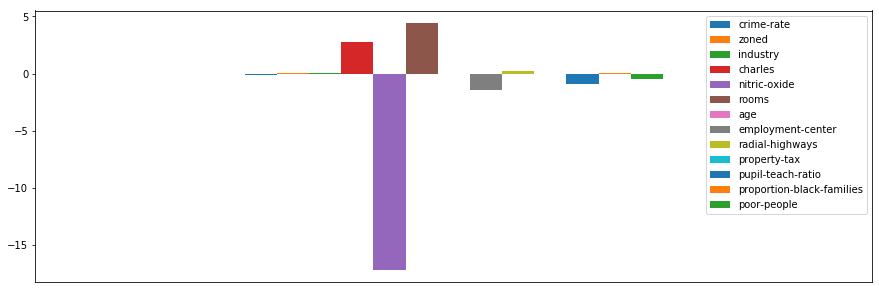

In [23]:
%matplotlib inline
cdf = pd.DataFrame([list(lr.coef_)], columns=df.columns[:-1])
plt = cdf.plot(figsize=(15,5), kind='bar', legend=True)
plt.xaxis.set_visible(False)

In [24]:
df["median-value"].mean()

22.532806324110698

In [25]:
bl = [df["median-value"].mean()] * len(y_test)
bl

[22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324110698,
 22.532806324

In [26]:
rmse_bl = np.sqrt(mean_squared_error(y_test, bl))
rmse_bl

8.626987411433014

(-0.4273207723732827, 7.065041586254333e-24)

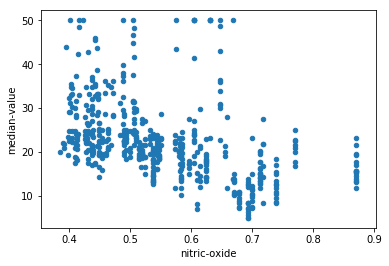

In [27]:
from scipy.stats import pearsonr
df.plot(x='nitric-oxide', y='median-value', kind='scatter')
pearsonr(df['nitric-oxide'], df['median-value'])

(0.6953599470715393, 2.487228871008295e-74)

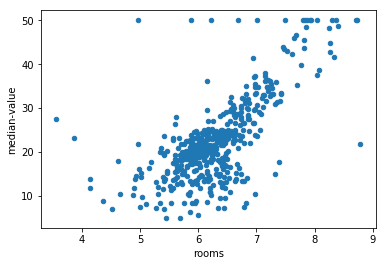

In [28]:
df.plot(x='rooms', y='median-value', kind='scatter')
pearsonr(df['rooms'], df['median-value'])

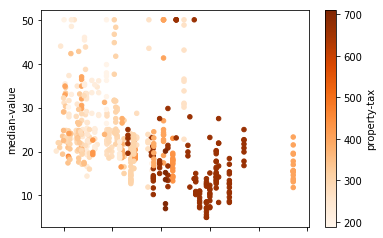

In [29]:
df.plot(x='nitric-oxide', y='median-value', c='property-tax',
colormap='Oranges', kind='scatter')

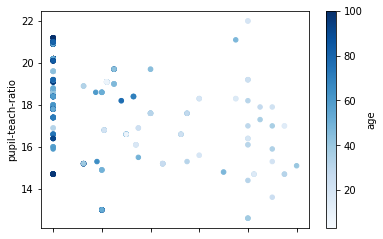

In [30]:
df.plot(x='zoned', y='pupil-teach-ratio', c='age',
colormap='Blues', kind='scatter')

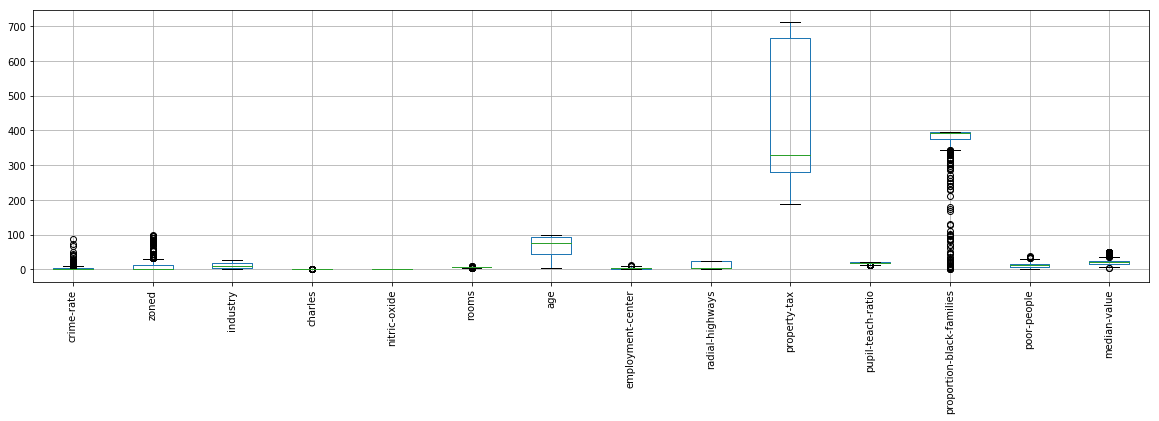

In [31]:
df.boxplot(figsize=(20,5), rot=90)

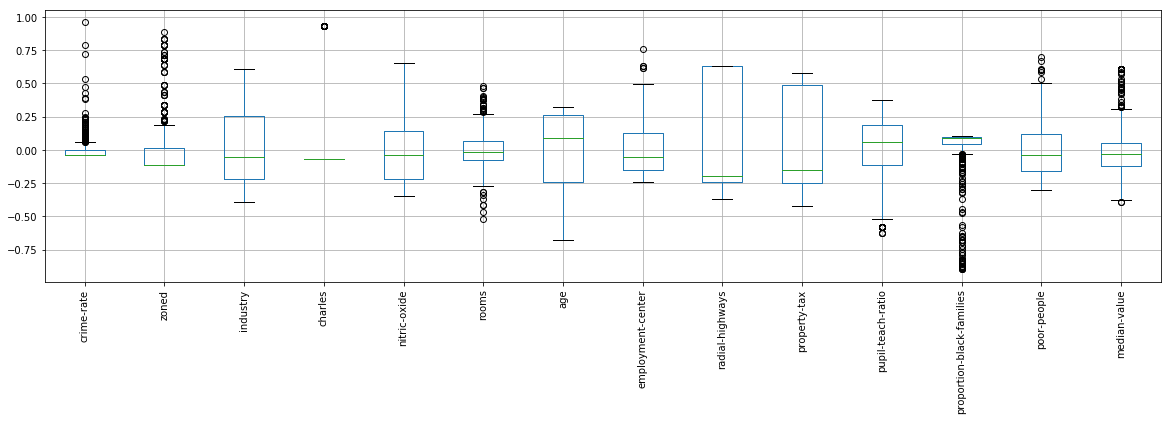

In [32]:
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.boxplot(figsize=(20,5), rot=90)

In [33]:
X = df_norm.loc[:, df_norm.columns != "median-value"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
list(zip(df.columns[:-1], lr.coef_))

[('crime-rate', -10.05857199026829),
 ('zoned', 3.0110464145648237),
 ('industry', 1.1015860528758288),
 ('charles', 2.784438203507968),
 ('nitric-oxide', -8.360479828405731),
 ('rooms', 23.16628090625856),
 ('age', -0.6113767706863503),
 ('employment-center', -15.922030671196222),
 ('radial-highways', 6.035883918457007),
 ('property-tax', -5.578916008261574),
 ('pupil-teach-ratio', -8.605288660399895),
 ('proportion-black-families', 4.898292327211117),
 ('poor-people', -18.430628422024256)]

In [37]:
y_pred = lr.predict(X_test)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_model

4.928602182665334